In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
players = pd.read_csv('csv/players.csv')

In [18]:
players.head(2)

,index,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1


In [65]:
players = players.rename(columns={'index':'Index', 'cost':'Price'})

In [61]:
players.groupby('Position').aggregate({'index':'count'})

,index
Position,
Attacking Midfield,41
Central Midfield,74
Centre-Back,87
Centre-Forward,70
Defensive Midfield,41
Goalkeeper,19
Left Midfield,8
Left Winger,46
Left-Back,23


In [27]:
players[players.Position=='Second Striker']

,index,Name,Position,Age,cost,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
26,26,João Félix,Second Striker,22,63.0,Portugal,Atlético de Madrid,11,1,0,2,3,1,0,5,4
89,89,Paulo Dybala,Second Striker,28,45.0,Argentina,Juventus FC,11,6,0,4,1,0,0,1,5
92,92,Antoine Griezmann,Second Striker,30,45.0,France,Atlético de Madrid,15,5,0,1,1,0,1,3,6
135,135,Ángel Correa,Second Striker,26,36.0,Argentina,Atlético de Madrid,16,3,0,3,2,0,0,6,7
223,223,Joaquín Correa,Second Striker,27,27.0,Argentina,Inter Milan,11,4,0,0,2,0,0,8,3
238,238,Thomas Müller,Second Striker,32,27.0,Germany,Bayern Munich,18,6,0,12,0,0,0,1,11
345,345,Andrej Kramaric,Second Striker,30,20.7,Croatia,TSG 1899 Hoffenheim,13,4,0,6,2,0,0,0,2
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5


In [28]:
players[players.Position=='Left Midfield']

,index,Name,Position,Age,cost,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
43,43,Bukayo Saka,Left Midfield,20,58.5,England,Arsenal FC,13,2,0,2,1,0,0,2,7
162,162,Harvey Barnes,Left Midfield,23,31.5,England,Leicester City,13,3,0,2,2,0,0,2,6
176,176,Robin Gosens,Left Midfield,27,31.5,Germany,Atalanta BC,8,2,0,1,2,0,0,1,4
278,278,Luis Díaz,Left Midfield,24,22.5,Colombia,FC Porto,16,11,0,2,3,0,0,1,11
360,360,Todd Cantwell,Left Midfield,23,19.8,England,Norwich City,7,1,0,0,2,0,0,2,1
424,424,Marc Cucurella,Left Midfield,23,18.0,Spain,Brighton & Hove Albion,11,0,0,1,2,0,0,3,2
445,445,Filip Kostic,Left Midfield,29,18.0,Serbia,Eintracht Frankfurt,13,2,0,5,1,0,0,1,2
474,474,Ryan Sessegnon,Left Midfield,21,16.2,England,Tottenham Hotspur,3,0,0,0,0,0,0,0,3


In [29]:
players[players.Position=='Right Midfield']

,index,Name,Position,Age,cost,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
235,235,Jesús Corona,Right Midfield,28,27.0,Mexico,FC Porto,10,0,0,2,1,0,0,4,3
273,273,Silas Katompa Mvumpa,Right Midfield,23,22.5,DR Congo,VfB Stuttgart,0,0,0,0,0,0,0,0,0
299,299,Ridle Baku,Right Midfield,23,22.5,Germany,VfL Wolfsburg,16,4,0,0,3,0,0,2,7
419,419,Nahitan Nández,Right Midfield,25,18.0,Uruguay,Cagliari Calcio,11,0,0,1,3,0,0,1,1
483,483,Manuel Lazzari,Right Midfield,27,16.2,Italy,SS Lazio,13,1,0,0,2,0,0,5,4


In [31]:
club_players = players.groupby('Club').aggregate({'index':'count'})

In [32]:
club_players

,index
Club,
AC Milan,13
ACF Fiorentina,5
AS Monaco,8
AS Roma,9
Ajax Amsterdam,6
...,...
Villarreal CF,6
Watford FC,1
West Ham United,7


In [34]:
club_players = club_players.sort_values(['index'], ascending=False)

In [52]:
count = 10
club_players.dtypes

Counts    int64
dtype: object

In [53]:
club_players = club_players.rename(columns={'index':'Counts'})

In [54]:
club_players[club_players.Counts>count]

,Counts
Club,
Manchester United,19
Manchester City,18
Chelsea FC,16
Tottenham Hotspur,16
Real Madrid,16
Paris Saint-Germain,16
RB Leipzig,15
Arsenal FC,15
Liverpool FC,15


In [55]:
club_players.index

Index(['Manchester United', 'Manchester City', 'Chelsea FC',
       'Tottenham Hotspur', 'Real Madrid', 'Paris Saint-Germain', 'RB Leipzig',
       'Arsenal FC', 'Liverpool FC', 'Atlético de Madrid', 'Bayern Munich',
       'AC Milan', 'Juventus FC', 'Everton FC', 'Leicester City',
       'Atalanta BC', 'Wolverhampton Wanderers', 'FC Barcelona',
       'Borussia Dortmund', 'Aston Villa', 'SSC Napoli', 'Real Sociedad',
       'AS Roma', 'AS Monaco', 'Inter Milan', 'Olympique Lyon', 'LOSC Lille',
       'Olympique Marseille', 'West Ham United', 'Ajax Amsterdam',
       'Sevilla FC', 'Villarreal CF', 'Leeds United', 'Bayer 04 Leverkusen',
       'Borussia Mönchengladbach', 'Brighton & Hove Albion', 'SL Benfica',
       'VfL Wolfsburg', 'ACF Fiorentina', 'Southampton FC', 'SS Lazio',
       'Crystal Palace', 'Valencia CF', 'Sporting CP', 'Real Betis Balompié',
       'Zenit St. Petersburg', 'Athletic Bilbao', 'Shakhtar Donetsk',
       'VfB Stuttgart', 'Eintracht Frankfurt', 'FC Porto', 'N

In [56]:
players[players.Club=='Real Madrid']

,index,Name,Position,Age,cost,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
41,41,Casemiro,Defensive Midfield,29,63.0,Brazil,Real Madrid,15,0,0,1,4,0,0,1,2
44,44,Federico Valverde,Central Midfield,23,58.5,Uruguay,Real Madrid,12,0,0,1,0,0,0,2,4
60,60,Thibaut Courtois,Goalkeeper,29,54.0,Belgium,Real Madrid,16,0,0,0,1,0,0,0,0
64,64,Eduardo Camavinga,Central Midfield,19,49.5,France,Real Madrid,20,2,0,1,5,0,0,11,5
75,75,David Alaba,Centre-Back,29,49.5,Austria,Real Madrid,15,1,0,3,1,0,0,0,0
80,80,Vinícius Júnior,Left Winger,21,45.0,Brazil,Real Madrid,16,9,0,7,3,0,0,2,6
86,86,Ferland Mendy,Left-Back,26,45.0,France,Real Madrid,6,0,0,0,2,0,0,1,2
125,125,Éder Militão,Centre-Back,23,36.0,Brazil,Real Madrid,16,0,0,0,1,0,0,0,1
161,161,Rodrygo,Right Winger,20,31.5,Brazil,Real Madrid,14,2,0,1,2,0,0,9,5
173,173,Marco Asensio,Right Winger,25,31.5,Spain,Real Madrid,13,3,0,1,0,0,0,8,5


In [57]:
players.Age.max()

36

In [66]:
players[players.Age > 33]

,Index,Name,Position,Age,Price,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
20,20,Lionel Messi,Right Winger,34,72.0,Argentina,Paris Saint-Germain,8,3,0,0,1,0,0,1,2
113,113,Cristiano Ronaldo,Centre-Forward,36,40.5,Portugal,Manchester United,14,10,0,1,4,0,0,2,3


In [115]:
club_price=players.groupby('Club',as_index=False).aggregate({'Price':'sum'})

In [116]:
club_price

,Club,Price
0,AC Milan,358.2
1,ACF Fiorentina,123.3
2,AS Monaco,190.8
3,AS Roma,251.1
4,Ajax Amsterdam,135.0
...,...,...
76,Villarreal CF,166.5
77,Watford FC,24.3
78,West Ham United,224.1
79,Wolverhampton Wanderers,277.2


In [122]:
club_price = club_price.sort_values(['Price'],ascending=False)

In [123]:
top_clubs_500 = club_price[club_price.Price > 500]

In [124]:
top_5_clubs = club_price.head(5)

In [125]:
top_10_clubs = club_price.head(10)

In [126]:
top_20_clubs = club_price.head(20)

In [128]:
top_20_clubs_array = top_20_clubs.Club.to_numpy()

In [129]:
s = pd.Series(top_20_clubs_array)

In [137]:
top_20_clubs

,Club,Price
42,Manchester City,940.5
50,Paris Saint-Germain,775.8
43,Manchester United,760.5
21,Chelsea FC,709.2
12,Bayern Munich,685.8
41,Liverpool FC,681.3
10,Atlético de Madrid,616.5
54,Real Madrid,594.0
69,Tottenham Hotspur,536.4
36,Juventus FC,450.0


In [143]:
top20 = pd.merge(players,top_20_clubs,on=['Club'])

In [146]:
top20_positions = top20.groupby(['Club', 'Position']).agg({'Index':'count'}).rename(columns={'Index':'Count_players'})

In [149]:
top20_count_player = top20_positions.groupby('Club').agg({'Count_players':'count'})

In [152]:
top20_count_player = pd.merge(top20_count_player,top_20_clubs,on=['Club']).sort_values(['Price'],ascending=False)

In [155]:
top20_count_player['mean_player_price'] = top20_count_player['Price'] / top20_count_player['Count_players'] 

In [157]:
top20_count_player.sort_values(['mean_player_price'],ascending=False)

,Club,Count_players,Price,mean_player_price
13,Manchester City,10,940.5,94.0500
15,Paris Saint-Germain,9,775.8,86.2000
6,Chelsea FC,9,709.2,78.8000
14,Manchester United,10,760.5,76.0500
12,Liverpool FC,9,681.3,75.7000
9,Inter Milan,5,373.5,74.7000
4,Bayern Munich,10,685.8,68.5800
3,Atlético de Madrid,9,616.5,68.5000
17,Real Madrid,9,594.0,66.0000
8,FC Barcelona,8,450.0,56.2500


In [158]:
top20_count_player

,Club,Count_players,Price,mean_player_price
13,Manchester City,10,940.5,94.0500
15,Paris Saint-Germain,9,775.8,86.2000
14,Manchester United,10,760.5,76.0500
6,Chelsea FC,9,709.2,78.8000
4,Bayern Munich,10,685.8,68.5800
12,Liverpool FC,9,681.3,75.7000
3,Atlético de Madrid,9,616.5,68.5000
17,Real Madrid,9,594.0,66.0000
19,Tottenham Hotspur,10,536.4,53.6400
10,Juventus FC,8,450.0,56.2500


<AxesSubplot:xlabel='Price', ylabel='Club'>

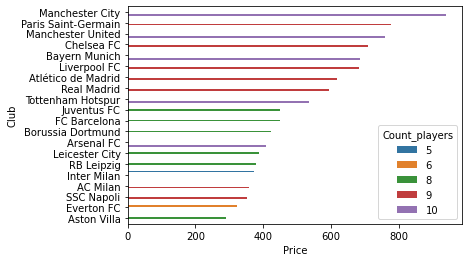

In [164]:
sns.barplot(data=top20_count_player, x=top20_count_player['Price'], \
            y=top20_count_player["Club"], hue=top20_count_player['Count_players'])

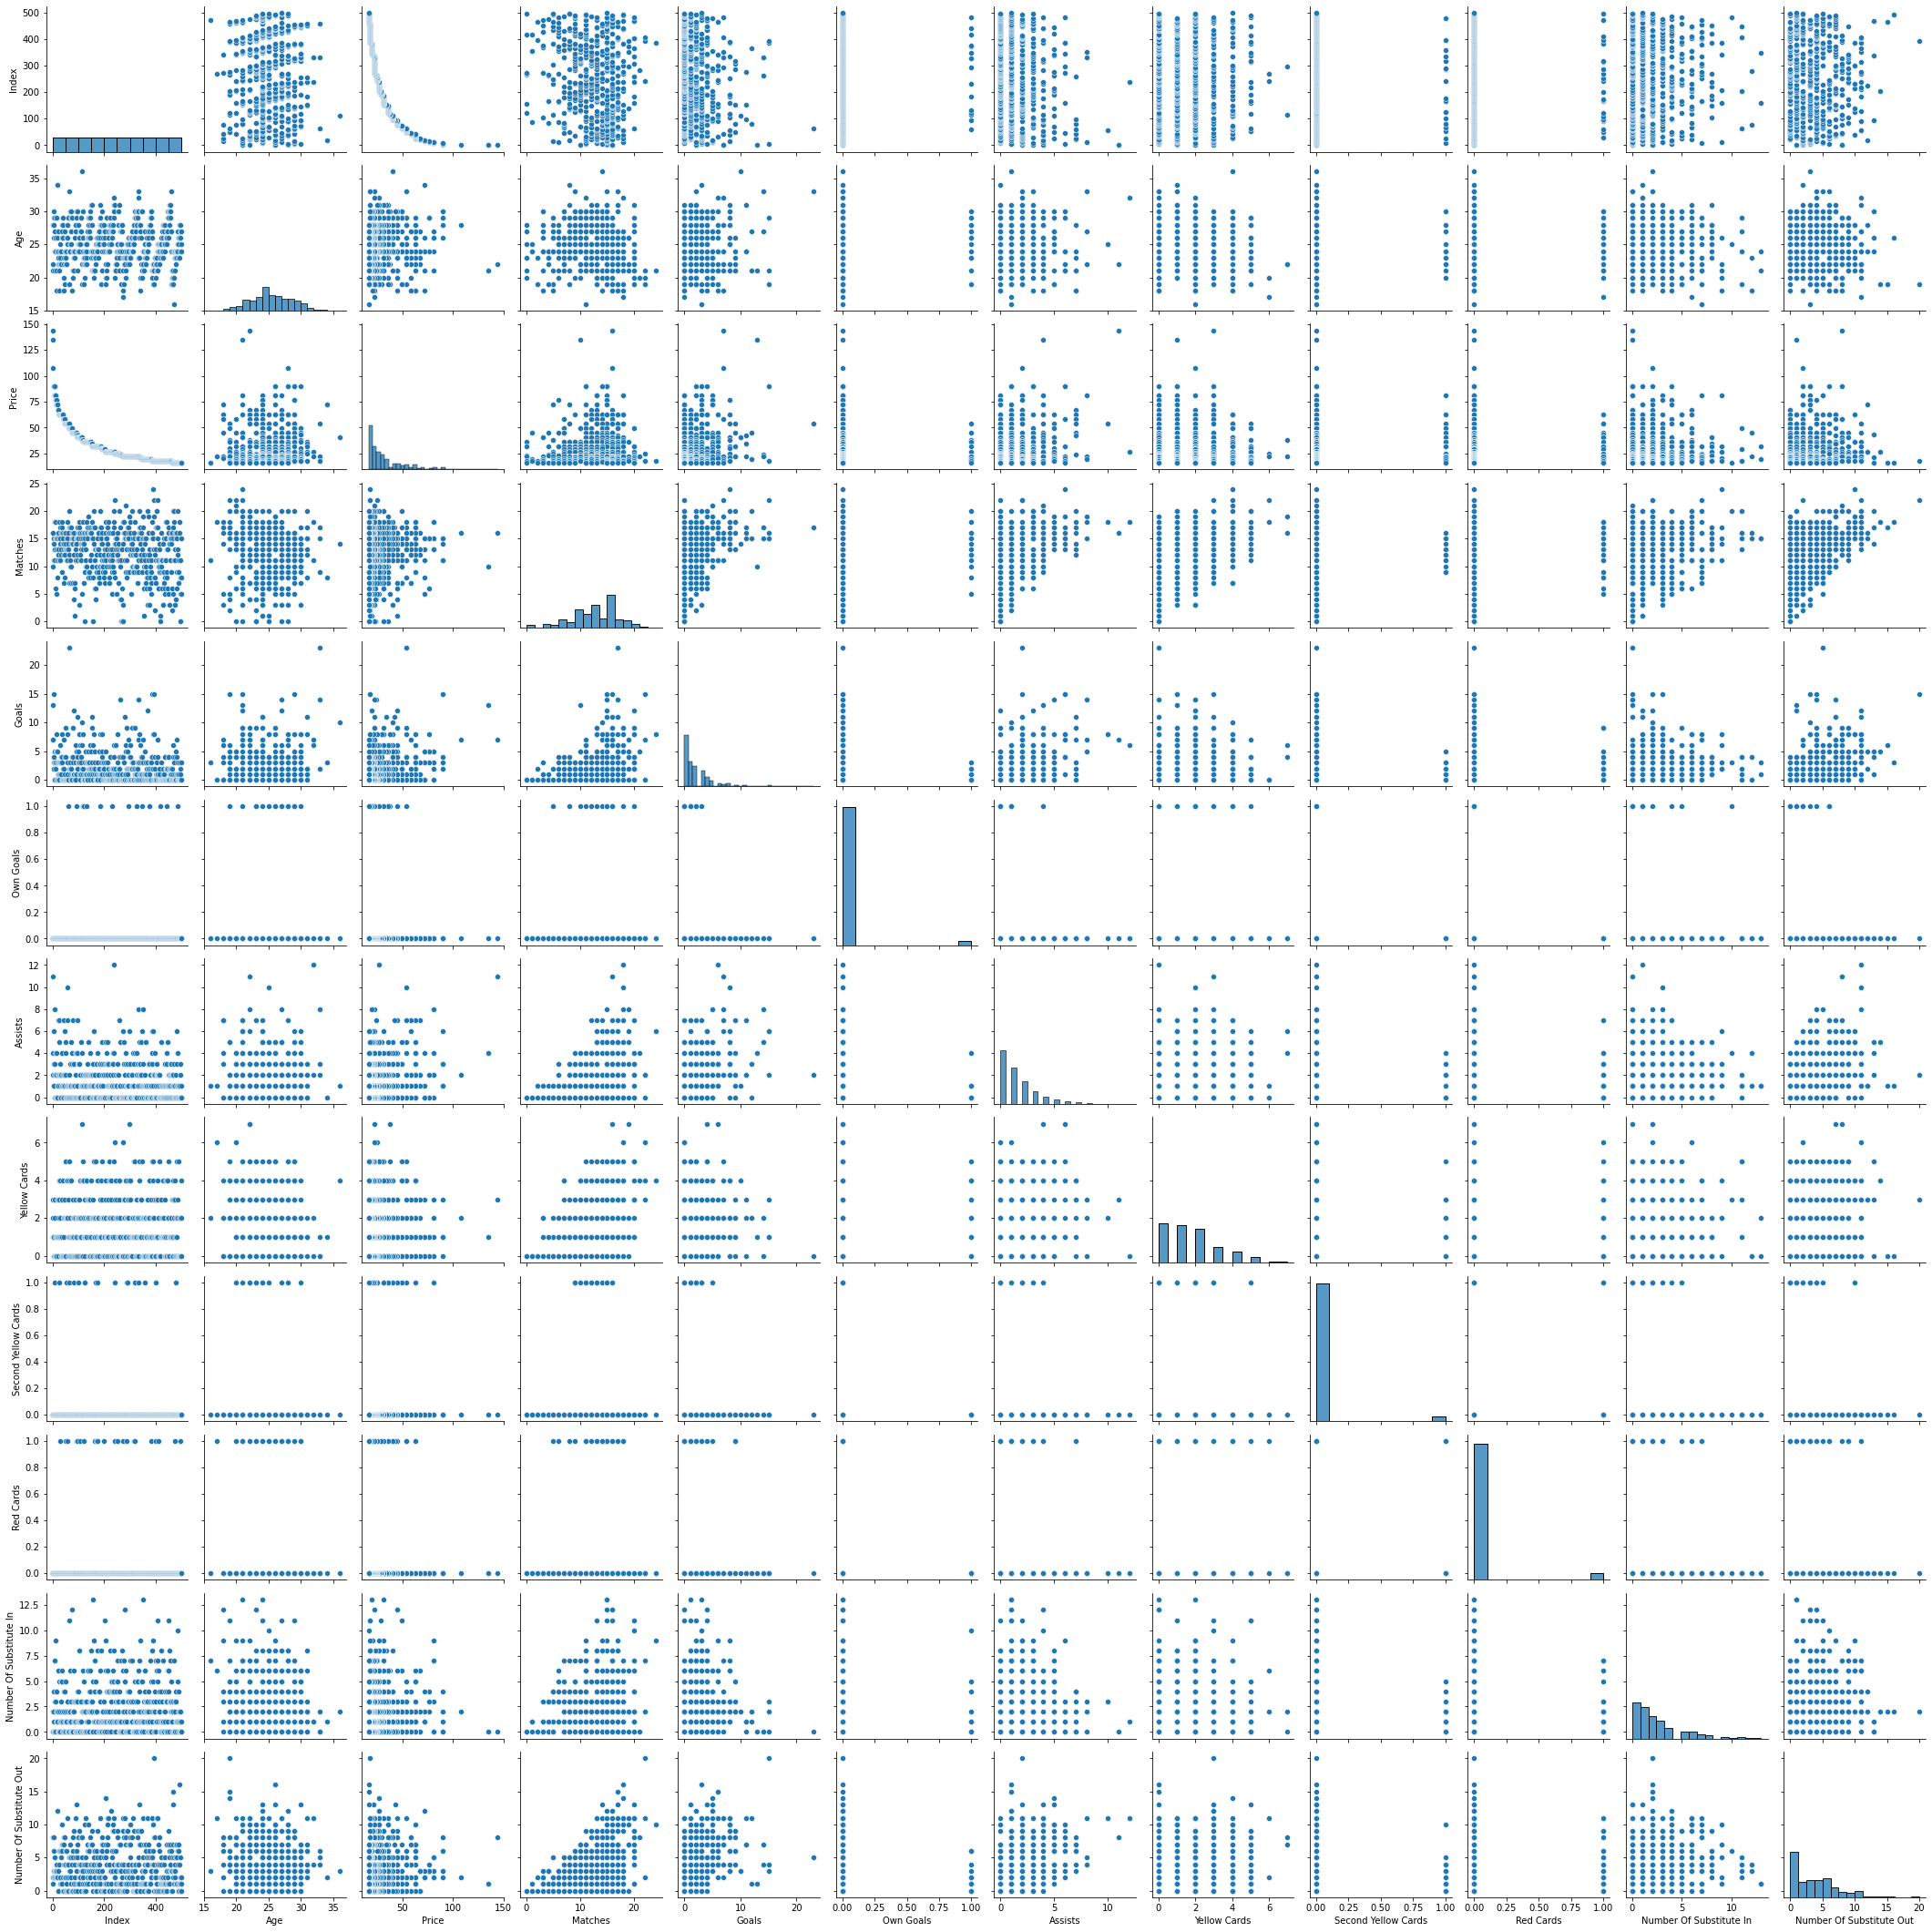

In [162]:
sns.pairplot(players)

<AxesSubplot:xlabel='Age', ylabel='Price'>

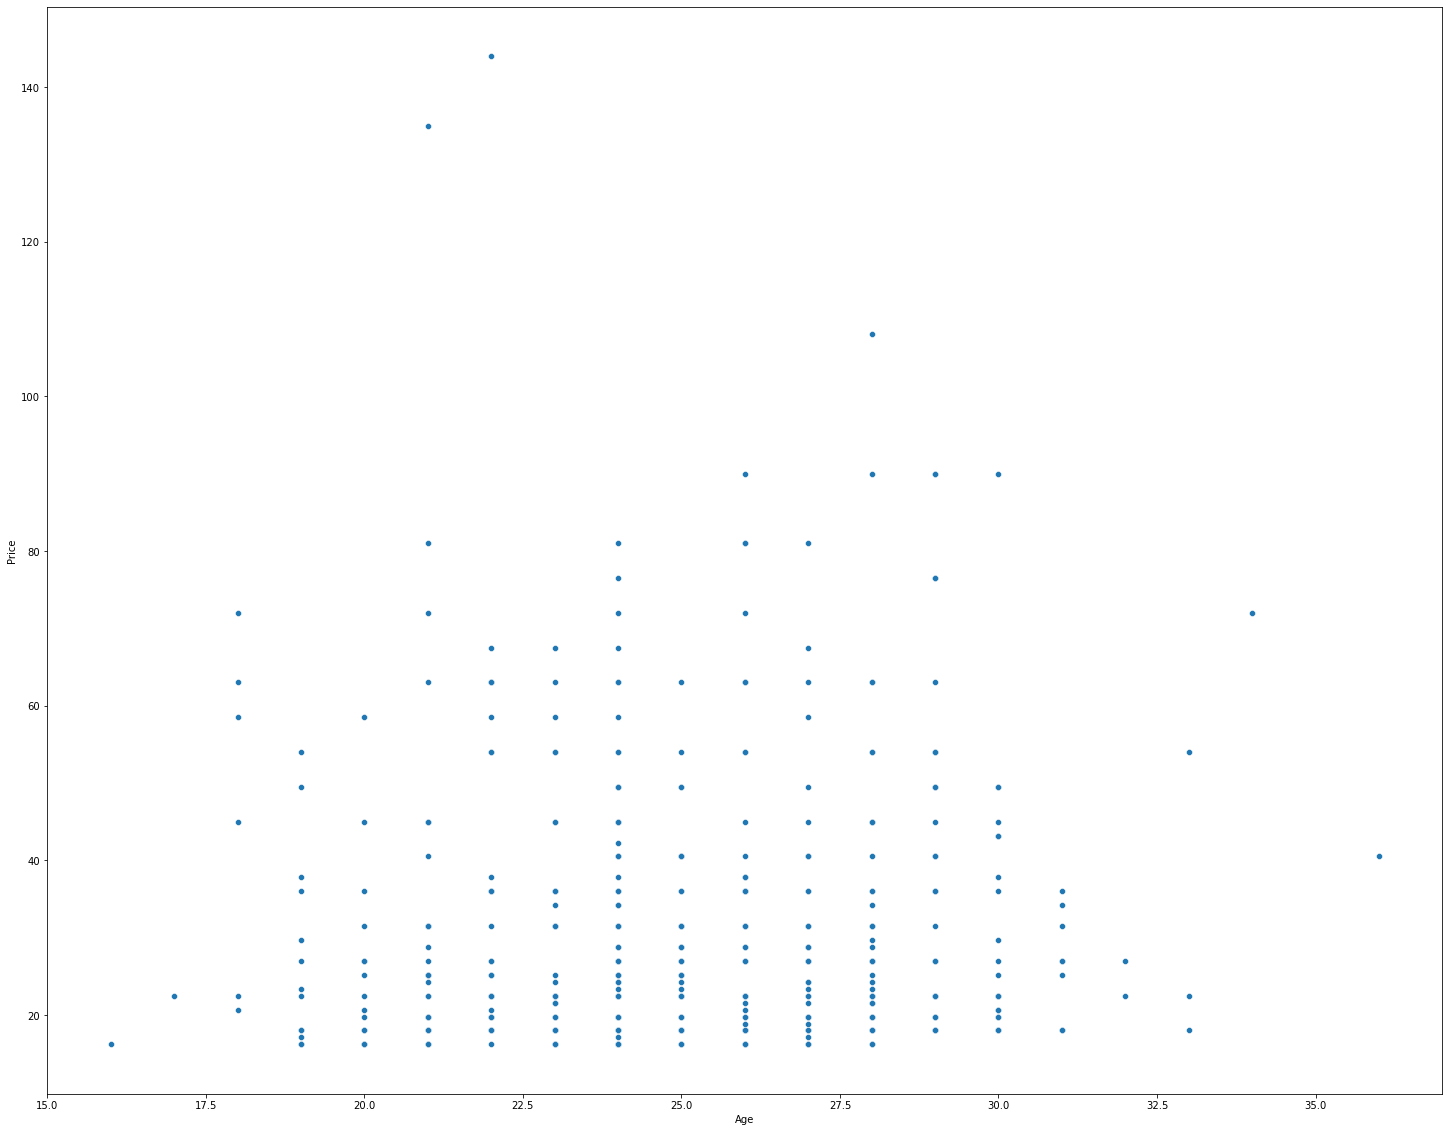

In [172]:
plt.figure(figsize=(25,20))
sns.scatterplot(data=players, x="Age", y="Price")

In [165]:
players.head(2)

,Index,Name,Position,Age,Price,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
